In [2]:
import pandas as pd
import numpy as np
import re
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_recall_curve

In [3]:
df = pd.read_csv('ceasefires_dataset.csv')

In [4]:
df.columns

Index(['cc', 'cf_id', 'uniq_id', 'location', 'region', 'link', 'ucdp_actor_id',
       'actor_name', 'ucdp_acd_id', 'ucdp_dyad', 'pax_id', 'cf_dec_yr',
       'cf_dec_month', 'cf_dec_day', 'cf_effect_yr', 'cf_effect_month',
       'cf_effect_day', 'evidence_onset', 'side', 'partial', 'written',
       'fixed', 'fixed_time', 'nsa_frac', 'p_humanitarian', 'p_peaceprocess',
       'p_holiday', 'p_election', 'p_other', 'p_other_comment', 'p_unclear',
       'ceasefire_class', 'timing', 'cf_pp', 'mediator_nego', 'mediator_send',
       'implement', 'enforcement', 'ddr', 'splinter', 'ended', 'end_yr',
       'end_month', 'end_day', 'evidence_end', 'comment', 'factivia_source',
       'factivia_page', 'truce', 'recentadditions', 'link_id1', 'link_id2',
       'link_id3', 'link_id4', 'link_id5', 'link_id6', 'link_id7', 'link_id8',
       'link_id9', 'link_id10', 'link_id11', 'link_id12', 'link_id13',
       'link_id14', 'link_id15', 'link_id16', 'link_id17', 'link_id18',
       'link_id19', 'l

In [5]:
df['fixed_time'].unique()

array(['0', '6', '31', '12', '18', '41', '-1', '13', '15', '2', '90',
       '11', '1', '10',
       'Ceasefire declared over the holidays but unclear for how many days as nothing is stipulated. ',
       '5', '3', '270', '28', '30', 'Coffee Harvest', '60', '20', '8',
       '21', '180', '27', '79', '102', '4', '32', '37',
       'Duration of elections', '72 hours', '14', '7', '22',
       'length not specified but to allow refugees to leave the area',
       'Unspecified: to allow pullout', '16', '29', '120',
       'Unclear how long this ceasefire is for, arranged to evacuate staff',
       '60 or for the duration of the peace talks',
       'Duration of peace talks', 'for the duration of Easter holidays',
       '103', '9', 'Duration of visit by Shevardnadze', '25',
       'Until mutual agreement enters into force',
       'No source relating to the length of the ceasefire brokered by the Red Cross in order to evacuate trapped civilians. ',
       'for the duration of the elections 

In [6]:
df.sample(10)

,cc,cf_id,uniq_id,location,region,link,ucdp_actor_id,actor_name,ucdp_acd_id,ucdp_dyad,...,link_id28,link_id29,link_id30,link_id31,link_id32,link_id33,link_id34,link_id35,coder,id
2593,666,19,666019,Israel,2,0,210,PNA,234,479.0,...,0.0,0,0,0,0,0,0,0,JB,2594
861,432,5,432005,Mali,4,0,72,Government of Mali,372,-1.0,...,0.0,0,0,0,0,0,0,0,AG,862
1284,490,9,490009,DR Congo (Zaire),4,0,89,Government of DR Congo (Zaire),283,585.0,...,0.0,0,0,0,0,0,0,0,CW,1285
3285,750,129,750129,India,3,1,363,NDFB,421,885.0,...,0.0,0,0,0,0,0,0,0,DL,3286
2047,625,130,625130,Sudan,4,0,112,Government of Sudan,309,670.0,...,0.0,0,0,0,0,0,0,0,EW,2048
2949,700,33,700033,Afghanistan,3,0,302,Junbish-i Milli-yi Islami,333,734.0,...,0.0,0,0,0,0,0,0,0,TS,2950
3408,770,29,770029,Pakistan,3,0,356,TTP,404,857.0,...,0.0,0,0,0,0,0,0,0,DL,3409
3925,840,81,840081,Philippines,3,0,154,Government of Philippines,209,411.0,...,0.0,0,0,0,0,0,0,0,TS,3926
134,343,10,343010,Macedonia,1,0,47,"Government of Macedonia, FYR",417,877.0,...,0.0,0,0,0,0,0,0,0,NG,135
2901,700,14,700014,Afghanistan,3,1,130,Government of Afghanistan,333,726.0,...,0.0,0,0,0,0,0,0,0,TS,2902


In [7]:
df = df.drop(columns=['link_id1', 'link_id2','link_id3','link_id4','link_id5','link_id6','link_id7','link_id8','link_id9','link_id10','link_id11','link_id12','link_id13','link_id14','link_id15','link_id16',
'link_id17','link_id18','link_id19','link_id20','link_id21','link_id22','link_id23','link_id24','link_id25', 'link_id25','link_id26','link_id27','link_id28','link_id29','link_id30','link_id31','link_id32','link_id33','link_id34', 'link_id35'])

In [8]:
df = df.drop(columns=['evidence_onset', 'evidence_end', 'comment', 'factivia_source', "cc",
"cf_id","uniq_id","ucdp_actor_id","actor_name","ucdp_acd_id","ucdp_dyad","pax_id","cf_dec_yr","cf_dec_month","cf_dec_day","cf_effect_yr",
"cf_effect_month","cf_effect_day","p_other_comment","cf_pp","splinter","end_yr","end_month","end_day","factivia_page","truce","recentadditions",
"coder","id"])

In [9]:
df.isna().sum().to_frame()

,0
location,0
region,0
link,0
side,0
partial,0
written,0
fixed,0
fixed_time,0
nsa_frac,0
p_humanitarian,0


In [10]:
df.columns

Index(['location', 'region', 'link', 'side', 'partial', 'written', 'fixed',
       'fixed_time', 'nsa_frac', 'p_humanitarian', 'p_peaceprocess',
       'p_holiday', 'p_election', 'p_other', 'p_unclear', 'ceasefire_class',
       'timing', 'mediator_nego', 'mediator_send', 'implement', 'enforcement',
       'ddr', 'ended'],
      dtype='object')

In [11]:
df.corr(numeric_only=True)

,region,link,side,partial,written,fixed,nsa_frac,p_humanitarian,p_peaceprocess,p_holiday,p_election,p_other,p_unclear,ceasefire_class,timing,mediator_nego,implement,enforcement,ddr,ended
region,1.000000,0.148448,-0.063198,-0.224840,0.130735,0.009610,0.044165,-0.129392,0.121732,-0.031334,0.090770,-0.190827,-0.085061,0.189378,0.144457,-0.146046,0.031151,0.207663,0.199275,0.098330
link,0.148448,1.000000,0.112192,-0.136859,0.102260,0.100955,0.004233,-0.069340,0.153047,-0.057888,-0.019447,-0.074515,-0.078062,0.178135,0.221931,0.020280,0.221862,0.150715,0.096840,0.180566
side,-0.063198,0.112192,1.000000,-0.078289,0.438304,-0.251257,-0.081737,-0.022807,0.223011,-0.205622,-0.113631,-0.044648,0.006235,0.387211,0.366595,0.322053,0.379087,0.194003,0.227281,-0.126211
partial,-0.224840,-0.136859,-0.078289,1.000000,-0.223192,0.021824,0.009984,0.295550,-0.345781,-0.118982,-0.018364,0.145163,0.178031,-0.224893,-0.273725,0.013416,-0.171577,-0.130340,-0.144759,-0.112698
written,0.130735,0.102260,0.438304,-0.223192,1.000000,-0.246562,-0.046335,-0.093490,0.302098,-0.090718,-0.043924,-0.056520,-0.138786,0.497603,0.473732,0.317890,0.457293,0.248867,0.326686,-0.078715
fixed,0.009610,0.100955,-0.251257,0.021824,-0.246562,1.000000,0.040847,0.179783,-0.218143,0.231644,0.019450,0.077378,-0.133181,-0.249219,-0.175569,-0.172371,-0.150409,-0.133444,-0.170354,0.354291
nsa_frac,0.044165,0.004233,-0.081737,0.009984,-0.046335,0.040847,1.000000,0.027219,-0.025518,-0.011606,0.043541,0.002338,-0.013890,-0.021525,-0.029995,-0.040532,-0.045541,-0.023578,0.003647,0.019100
p_humanitarian,-0.129392,-0.069340,-0.022807,0.295550,-0.093490,0.179783,0.027219,1.000000,-0.324498,-0.123879,-0.055593,0.212600,-0.146672,-0.124142,-0.194801,0.080216,-0.095591,0.017362,-0.094504,0.022833
p_peaceprocess,0.121732,0.153047,0.223011,-0.345781,0.302098,-0.218143,-0.025518,-0.324498,1.000000,-0.279473,-0.095295,-0.261540,-0.426940,0.310882,0.640353,0.143087,0.267128,0.163348,0.213955,0.058656
p_holiday,-0.031334,-0.057888,-0.205622,-0.118982,-0.090718,0.231644,-0.011606,-0.123879,-0.279473,1.000000,-0.032158,-0.063578,-0.069307,-0.120664,-0.202996,-0.114717,-0.096518,-0.101566,-0.090540,0.010117


In [12]:
import matplotlib.pyplot as plt

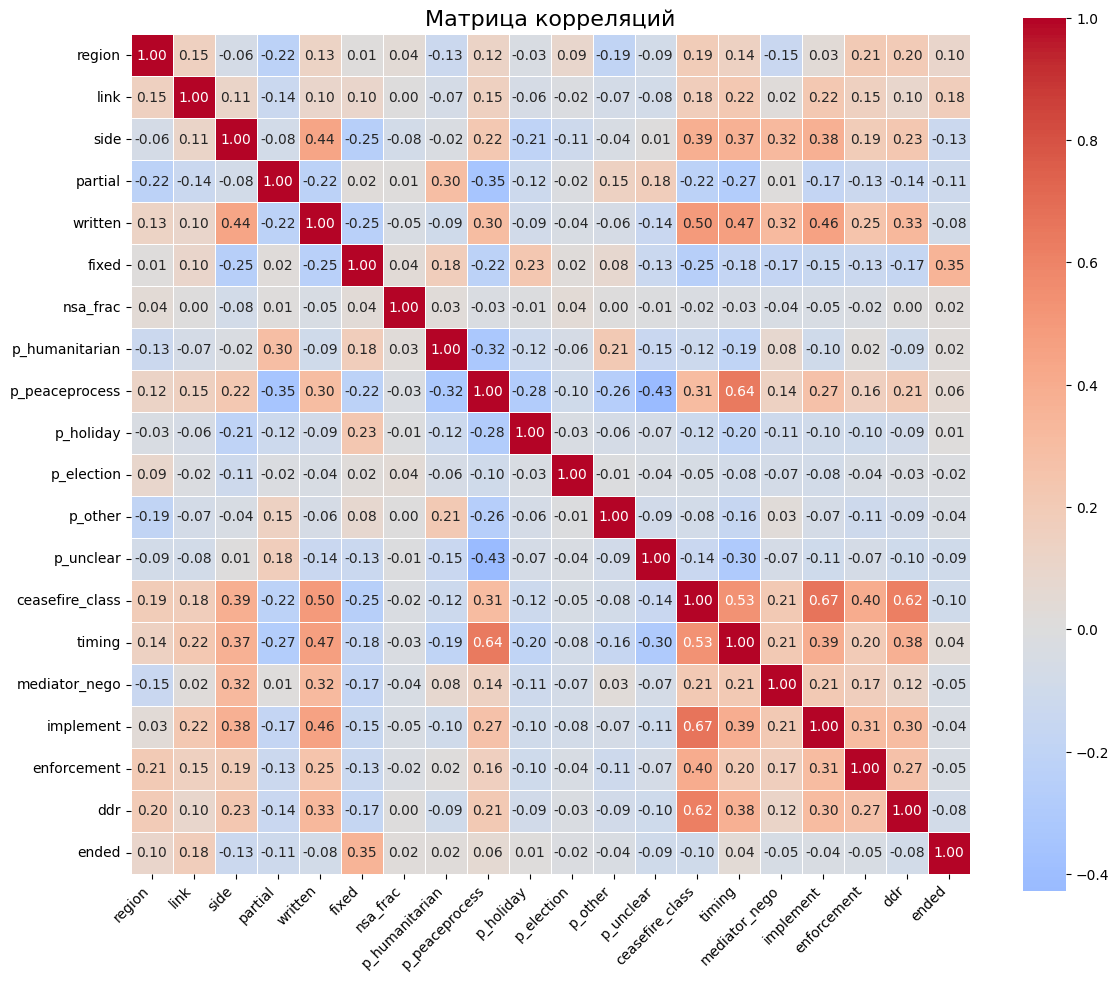

In [13]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f',
            linewidths=0.5)

plt.title('Матрица корреляций', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
df.columns

Index(['location', 'region', 'link', 'side', 'partial', 'written', 'fixed',
       'fixed_time', 'nsa_frac', 'p_humanitarian', 'p_peaceprocess',
       'p_holiday', 'p_election', 'p_other', 'p_unclear', 'ceasefire_class',
       'timing', 'mediator_nego', 'mediator_send', 'implement', 'enforcement',
       'ddr', 'ended'],
      dtype='object')

In [15]:
df['success'] = df['ended'].apply(lambda x: 1 if x in [0, 1] else 0)
df = df.drop('ended', axis=1)

In [16]:
print(df['success'].value_counts(normalize=True))

success
0    0.795405
1    0.204595
Name: proportion, dtype: float64


In [17]:
X = df.drop(columns='success')
y = df['success']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Шаг 4: Очистка и обработка fixed_time
def clean_fixed_time(x):
    if pd.isna(x):
        return np.nan
    x_str = str(x).lower()
    numbers = re.findall(r'\d+', x_str)
    if numbers:
        return float(numbers[0])
    return np.nan

df['fixed_time'] = df['fixed_time'].apply(clean_fixed_time)
df['is_fixed_time_unclear'] = df['fixed_time'].isna().astype(int)

In [20]:
categorical_cols = ['location', 'region', 'link', 'side', 'partial', 'written', 'fixed', 'nsa_frac',
                   'p_humanitarian', 'p_peaceprocess', 'p_holiday', 'p_election', 'p_other', 'p_unclear',
                   'ceasefire_class', 'timing', 'implement', 'enforcement', 'ddr', 'is_fixed_time_unclear']
numeric_cols = ['fixed_time']

if 'mediator_nego' in df.columns:
    df['mediator_nego_count'] = df['mediator_nego'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)
    df['has_mediator_nego'] = df['mediator_nego'].notna().astype(int)
    categorical_cols.append('has_mediator_nego')
    numeric_cols.append('mediator_nego_count')
    df = df.drop('mediator_nego', axis=1)

if 'mediator_send' in df.columns:
    df['mediator_send_count'] = df['mediator_send'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)
    df['has_mediator_send'] = df['mediator_send'].notna().astype(int)
    categorical_cols.append('has_mediator_send')
    numeric_cols.append('mediator_send_count')
    df = df.drop('mediator_send', axis=1)

# Шаг 6: Разделение данных
X = df.drop('success', axis=1)
y = df['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Шаг 7: Преобразователь
transformers = []
if numeric_cols:
    transformers.append(('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numeric_cols))
if categorical_cols:
    transformers.append(('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), categorical_cols))

preprocessor = ColumnTransformer(transformers=transformers)

# Шаг 8: Модели и тюнинг
models = {
    'LogisticRegression': {
        'model': LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear'),
        'params': {'classifier__C': [0.1, 1, 10]}
    },
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42, min_samples_split=5),
        'params': {'classifier__n_estimators': [50, 100], 'classifier__max_depth': [5, 10]}
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {'classifier__n_estimators': [50, 100], 'classifier__learning_rate': [0.01, 0.1], 'classifier__max_depth': [3, 5]}
    },
    'XGBoost': {
        'model': XGBClassifier(eval_metric='logloss', scale_pos_weight=1.2 * (y_train.value_counts()[0] / y_train.value_counts()[1]), max_depth=5, min_child_weight=2, gamma=0.2),
        'params': {'classifier__n_estimators': [100], 'classifier__learning_rate': [0.01, 0.05]}
    }
}

best_model = None
best_auc = 0
best_params = {}  # Словарь для сохранения лучших параметров

for name, config in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', config['model'])
    ])
    
    grid = GridSearchCV(pipeline, config['params'], cv=StratifiedKFold(10), scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    y_pred = grid.predict(X_test)
    y_pred_proba = grid.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    acc = accuracy_score(y_test, y_pred)
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    f1_scores = 2 * precision * recall / (precision + recall + 1e-10)
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]
    y_pred_adjusted = (y_pred_proba >= optimal_threshold).astype(int)
    acc_adjusted = accuracy_score(y_test, y_pred_adjusted)
    
    print(f"{name} - Best Params: {grid.best_params_}")
    print(f"{name} - Test Accuracy: {acc:.4f}")
    print(f"{name} - Adjusted Accuracy: {acc_adjusted:.4f}")
    print(f"{name} - ROC AUC: {auc:.4f}")
    print(classification_report(y_test, y_pred))
    
    if hasattr(grid.best_estimator_.named_steps['classifier'], 'feature_importances_'):
        feature_names = grid.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
        importances = grid.best_estimator_.named_steps['classifier'].feature_importances_
        print(f"Важность признаков ({name}):", dict(zip(feature_names, importances)))
    
    if auc > best_auc:
        best_auc = auc
        best_model = grid.best_estimator_
        best_params[name] = {k.replace('classifier__', ''): v for k, v in grid.best_params_.items()}  # Сохранение параметров без префикса

# Шаг 9: Кросс-валидация для всех моделей
for name, config in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', config['model'].set_params(**best_params.get(name, {})))
    ])
    cv_scores = cross_val_score(pipeline, X, y, cv=StratifiedKFold(10), scoring='roc_auc')
    print(f"{name} CV ROC AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Вывод лучшей модели
cv_scores_best = cross_val_score(best_model, X, y, cv=StratifiedKFold(10), scoring='roc_auc')
print(f"Best Model CV ROC AUC: {cv_scores_best.mean():.4f} (+/- {cv_scores_best.std():.4f})")

LogisticRegression - Best Params: {'classifier__C': 1}
LogisticRegression - Test Accuracy: 0.7875
LogisticRegression - Adjusted Accuracy: 0.8132
LogisticRegression - ROC AUC: 0.8715
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       651
           1       0.49      0.84      0.62       168

    accuracy                           0.79       819
   macro avg       0.72      0.81      0.74       819
weighted avg       0.85      0.79      0.80       819

RandomForest - Best Params: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
RandomForest - Test Accuracy: 0.8535
RandomForest - Adjusted Accuracy: 0.8828
RandomForest - ROC AUC: 0.9245
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       651
           1       0.60      0.84      0.70       168

    accuracy                           0.85       819
   macro avg       0.78      0.85      0.80       819
weighted avg       

In [21]:
df['success'].unique()

array([0, 1])

In [25]:
df['fixed_time'].astype('int')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer